<a href="https://colab.research.google.com/github/JulioCastillo1/TP1-Datos/blob/master/Veracidad%20de%20los%20tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud as wc
import re
from matplotlib.colors import ListedColormap
from google.colab import files

%pylab inline

url='https://raw.githubusercontent.com/JulioCastillo1/TP1-Datos/master/train.csv'
tweets = pd.read_csv(url)
   

Populating the interactive namespace from numpy and matplotlib


Primera vista a la estructura del dataframe:

In [46]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Observamos los tipos de datos de cada columna:

In [47]:
tweets.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

Grafico el porcentaje de veracidad de tweets según keyword. **¿Qué asuntos están más asociados a desastres reales y cuáles a metafóricos?**

Primero borro filas sin keyword, luego miramos si hay keywords con muy pocos tweets, así los quito para que sea significativa la proporción

In [48]:
tweets_without_null_keyword = tweets.loc[~tweets['keyword'].isna()]
tweets_without_null_keyword['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
damage                   41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Como 9 comparado con 45, sigue siendo una cantidad válida, uso todos los keywords

In [49]:
truth_percentage_by_keyword = tweets_without_null_keyword.groupby('keyword')['target'].agg('mean')\
  .to_frame()\
  .sort_values(by='target', ascending=False)\
  .round({'target': 4})

truth_percentage_by_keyword.shape[0]

221

Como las categorías son más de 200, tengo que hacer un gráfico con el top 20 y el bottom 20, algo así, sino sería mala la visualización

Text(0, 0.5, 'Porcentaje de verdaderos')

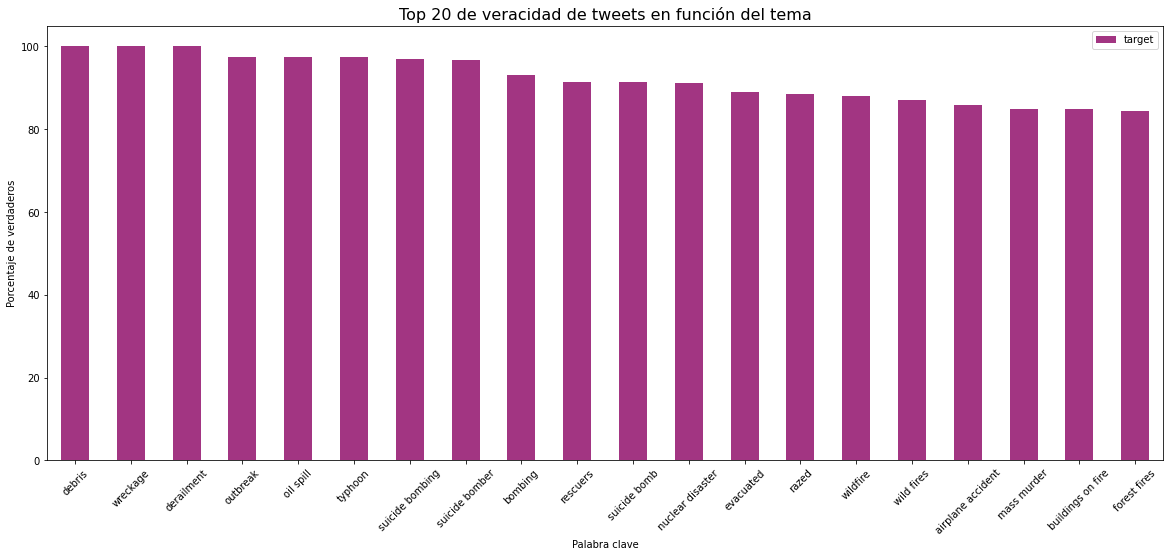

In [50]:
truth_percentage_by_keyword['target'] = truth_percentage_by_keyword['target'] * 100

truth_percentage_by_keyword_top20 = truth_percentage_by_keyword[:20]
truth_percentage_by_keyword_top20.index = truth_percentage_by_keyword_top20.index.str.replace('%20', ' ')

truth_percentage_by_keyword_top20.plot(kind='bar', figsize=(20,8), rot=45, color=ListedColormap(sns.color_palette('dark'))(6));
plt.title('Top 20 de veracidad de tweets en función del tema', fontsize=16)
ax = plt.gca();
ax.set_xlabel('Palabra clave')
ax.set_ylabel('Porcentaje de verdaderos')

Text(0, 0.5, 'Porcentaje de verdaderos')

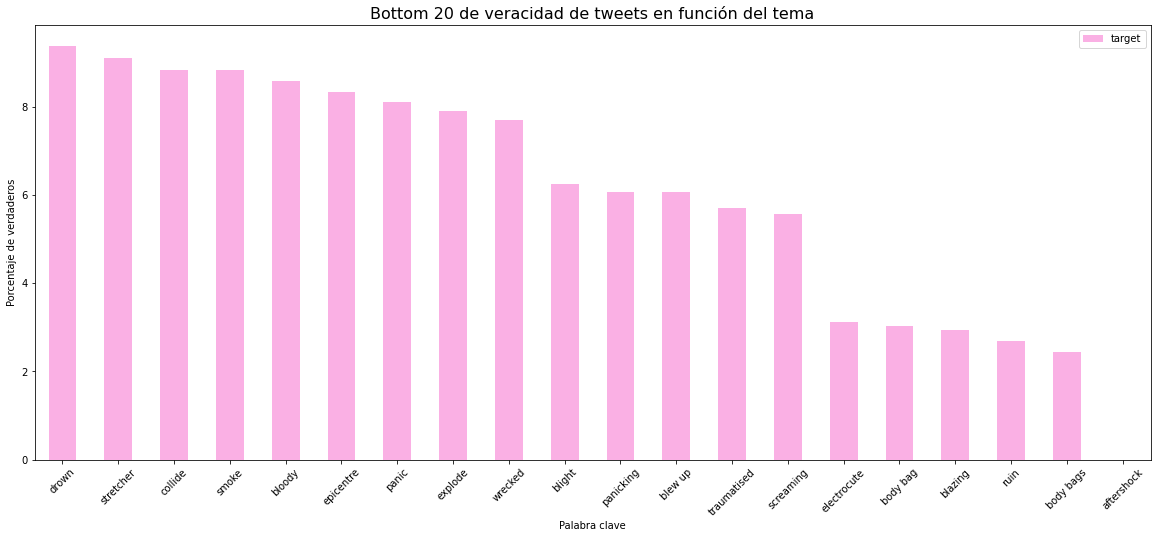

In [51]:
truth_percentage_by_keyword_bottom20 = truth_percentage_by_keyword[-20:] #ídem a .tail(20)
truth_percentage_by_keyword_bottom20.index = truth_percentage_by_keyword_bottom20.index.str.replace('%20', ' ')

truth_percentage_by_keyword_bottom20.plot(kind='bar', figsize=(20,8), rot=45, color=ListedColormap(sns.color_palette('pastel'))(6));
plt.title('Bottom 20 de veracidad de tweets en función del tema', fontsize=16)
ax = plt.gca();
ax.set_xlabel('Palabra clave')
ax.set_ylabel('Porcentaje de verdaderos')


**Conclusiones**

Observando los dos gráficos previos, se puede notar qué tipos de palabras clave suelen ser sobre desastres reales y cuáles se prestan más a la broma, metáfora, chiste u otro hecho artístico.

La lista de veracidad la encabezan palabras clave como debris (escombros), wreckage (destrucción), derailment (descarrilamiento), outbreak (brote), oil spill (derrame de petróleo), razed (arrasado), typhoon (tifón), wildfire (incendio forestal), airplane accidents (no hace falta traducción :)) y buildings on fire (incendios en edificios). 

La de tweets sobre desastres no reales tiene temas como drown (ahogar o empapar), stretcher (camilla), collide (colisionar), bloody (sangrante), panic (pánico), explode (explotar), wrecked (borracho), screaming (gritando), electrocute (electrocución), body bag (bolsa de cadáver), aftershock (que no es usado en el sentido del terremoto físico sino metafórico), blight (plaga de plantas, literal o metafórica). 

Entonces lo que se nota es que cuando las palabras claves están asociadas a desastres en gran escala, donde no se involucra a una persona sino a multitudes, cuando refiere a estructuras complejas, grandes o a un accidente en zona geográfica, estos hablan casi seguro de desastres reales.
En cambio los desastres no reales tienen como palabras claves las de asuntos más personales, individuales, emociones, o sea asuntos de menor escala.
Esa es la tendencia que se divisa.

---

Analogamente a lo que se hizo respecto al porcentaje de veracidad de tweets según keyword, ahora lo hacemos respecto a ubicaciones (location). **¿Qué ubicaciones están más asociados a desastres reales y cuáles a metafóricos?**

Primero saco los tweets con locación nula. Luego miramos si hay locations con muy pocos tweets, así los quito para que sea significativa la ubicación


In [52]:
tweets_without_null_location = tweets.loc[~tweets['location'].isna()]
tweets_without_null_location['location'].value_counts()

USA                       104
New York                   71
United States              50
London                     45
Canada                     29
                         ... 
Memphis,TN/ World Wide      1
CAMARILLO, CA               1
Basking Ridge, NJ           1
USA, Haiti, Nepal           1
New Your                    1
Name: location, Length: 3341, dtype: int64

Hay locaciones con un sólo tweet así que vamos a quitar las locations con menos del 5% de ocurrencia respecto a la que está al tope con 104, o sea borro todas los tweets con las locations usadas 5 veces o menos.

In [53]:
tweets_without_null_location = tweets_without_null_location.groupby('location').filter(lambda x: x['target'].sum() > 5)
truth_percentage_by_location = tweets_without_null_location.groupby('location')['target'].agg('mean')\
  .to_frame()\
  .round({'target': 4})

truth_percentage_by_location

,target
location,
Australia,0.5000
California,0.4118
"California, USA",0.5333
Canada,0.4483
"Chicago, IL",0.5000
"Denver, Colorado",0.6667
Earth,0.7273
India,0.8333
Indonesia,0.6154


No son tantas ubicaciones, se puede hacer el grááfico, pero hay nombres repetidos con pequeñas variaciones de caracteres, vamos a unificarlos (esto habría que hacerlo antes de quitar los locations con menos de 5 ocurrencias, pero hay en total 3341 locations...)

In [54]:
tweets_without_null_location['location'] = tweets_without_null_location['location'].replace('Los Angeles, CA', 'Los Angeles')\
  .replace('New York City', 'New York')\
  .replace('New York, NY', 'New York')\
  .replace('San Francisco, CA', 'San Francisco')\
  .replace('US', 'United States')\
  .replace('USA', 'United States')\
  .replace('Washington, DC', 'Washington, D.C.')\
  .replace('California, USA', 'California')\
  .replace('Earth', 'Worldwide')

tweets_without_null_location = tweets_without_null_location.groupby('location').filter(lambda x: x['target'].sum() > 5)
truth_percentage_by_location = tweets_without_null_location.groupby('location')['target'].agg('mean')\
  .to_frame()\
  .round({'target': 4})\
  .sort_values(by='target', ascending=False)\
  
truth_percentage_by_location['target'] = truth_percentage_by_location['target'] * 100

truth_percentage_by_location

,target
location,
Mumbai,86.36
India,83.33
Nigeria,78.57
"Nashville, TN",77.78
"Washington, D.C.",70.59
"Sacramento, CA",70.00
Worldwide,66.67
"Denver, Colorado",66.67
Indonesia,61.54


Es imprecisa la clasificación de ubicaciones, ya contiene distintas categorías: hay países, estados, ciudades e incluso hay uno que es el mundo entero (worldwide)

Text(0, 0.5, 'Porcentaje de verdaderos')

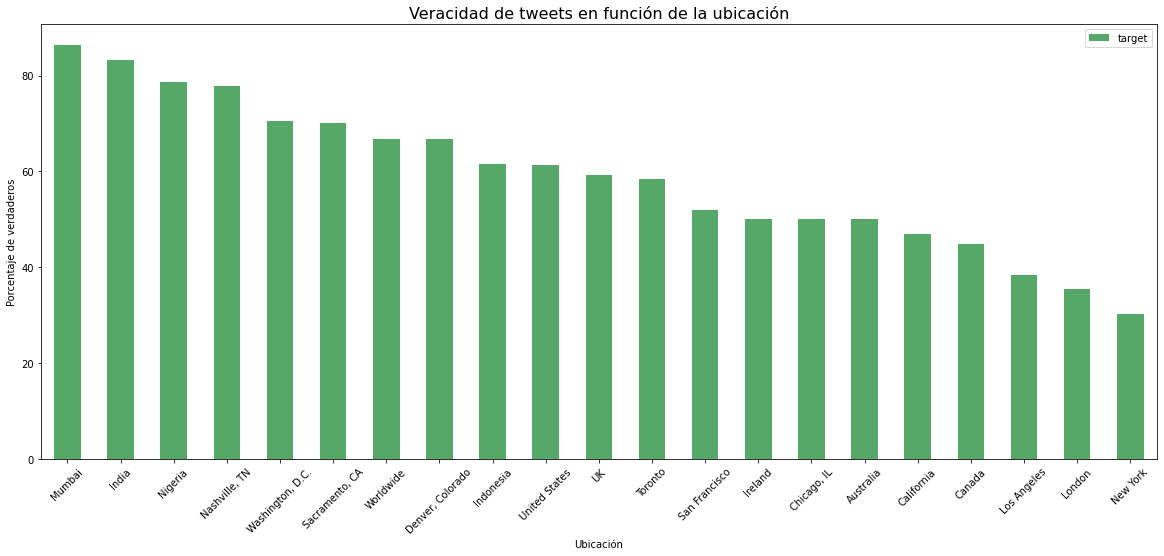

In [55]:
truth_percentage_by_location.plot(kind='bar', figsize=(20,8), rot=45, color=ListedColormap(sns.color_palette('deep'))(2)); 
plt.title('Veracidad de tweets en función de la ubicación', fontsize=16) 

ax = plt.gca()
ax.set_xlabel('Ubicación') 
ax.set_ylabel('Porcentaje de verdaderos')


In [56]:
tweets_without_null_location['location'].value_counts()

United States       163
New York             96
London               45
Los Angeles          39
Washington, D.C.     34
California           32
Worldwide            30
Canada               29
Nigeria              28
UK                   27
San Francisco        25
India                24
Mumbai               22
Chicago, IL          18
Australia            18
Indonesia            13
Toronto              12
Ireland              12
Sacramento, CA       10
Denver, Colorado      9
Nashville, TN         9
Name: location, dtype: int64

In [57]:
#Me quedo con las 20 locaciones con más uso
location_counter = tweets_without_null_location['location'].value_counts().iloc[0:20]
location_counter

United States       163
New York             96
London               45
Los Angeles          39
Washington, D.C.     34
California           32
Worldwide            30
Canada               29
Nigeria              28
UK                   27
San Francisco        25
India                24
Mumbai               22
Chicago, IL          18
Australia            18
Indonesia            13
Toronto              12
Ireland              12
Sacramento, CA       10
Denver, Colorado      9
Name: location, dtype: int64

Text(0, 0.5, 'Appearences')

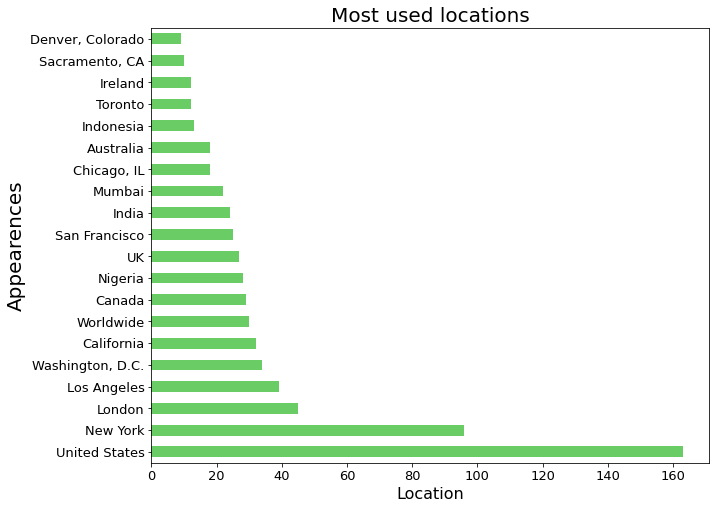

In [58]:
location_counter.plot(kind = 'barh',figsize = (10,8), color = ListedColormap(sns.color_palette('muted'))(2), fontsize = 13)
plt.title('Most used locations',fontsize  = 20)
plt.xlabel('Location',fontsize = 16)
plt.ylabel('Appearences', fontsize = 20)

**Conclusiones**

Observando los dos gráficos previos, se puede notar...

**Vamos a analizar la relación entre la longitud de los tweets y su veracidad**

In [59]:
tweets['longitud'] = tweets['text'].str.len()
tweets.to_csv("tweets_length.csv")
#files.download("tweets_length.csv")
tweets_description = tweets['longitud'].describe()
tweets_description = tweets_description.to_frame()
tweets_description.rename(index={'mean':'promedio', 'min':'mínimo', 'max':'máximo'}, inplace=True)
tweets_description.drop(['count', 'std', '25%', '50%', '75%'], inplace=True)
tweets_description['longitud'] = tweets_description['longitud'].astype(int)
tweets_description

,longitud
promedio,101
mínimo,7
máximo,157


In [60]:
bins = pd.cut(tweets['longitud'], bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
tweets['bin'] = bins
tweets

,id,keyword,location,text,target,longitud,bin
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,"(60, 80]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,"(20, 40]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,"(120, 140]"
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"(60, 80]"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,"(80, 100]"
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,"(80, 100]"
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,"(120, 140]"
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,"(60, 80]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,"(120, 140]"


In [0]:
tweets_percentage = tweets.groupby('bin').agg({'target':'mean'})
tweets_percentage['target'] = round(tweets_percentage['target'] * 100, 2);
tweets_percentage.rename(columns={'target':'porcentaje'}, inplace=True)

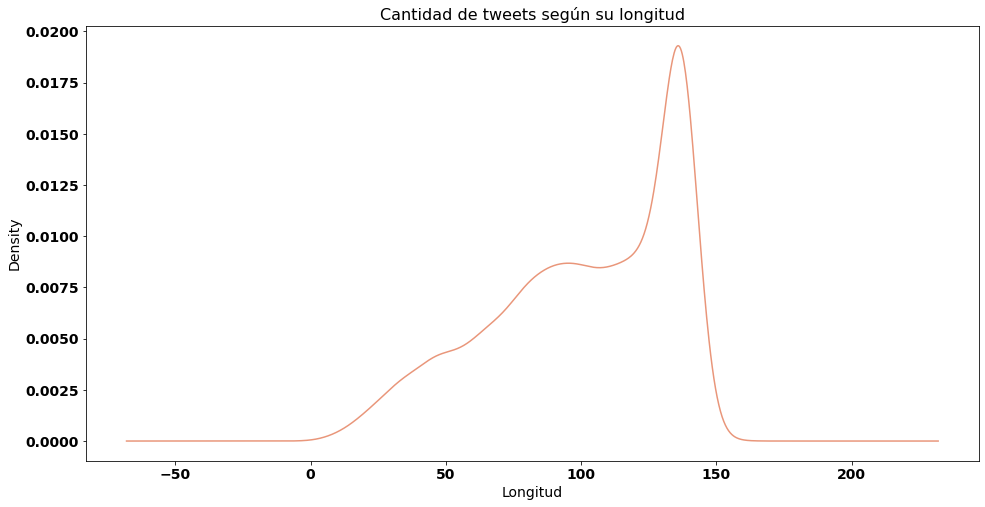

In [62]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['font.weight'] = 'bold'

fig = plt.figure()
ax = fig.add_subplot(111)

plt.title('Cantidad de tweets según su longitud', fontsize=16)
ax.set_xlabel('Longitud')
tweets['longitud'].plot.kde(color='darksalmon', figsize=(16, 8))

plt.show()

Text(0, 0.5, 'Cantidad de caracteres')

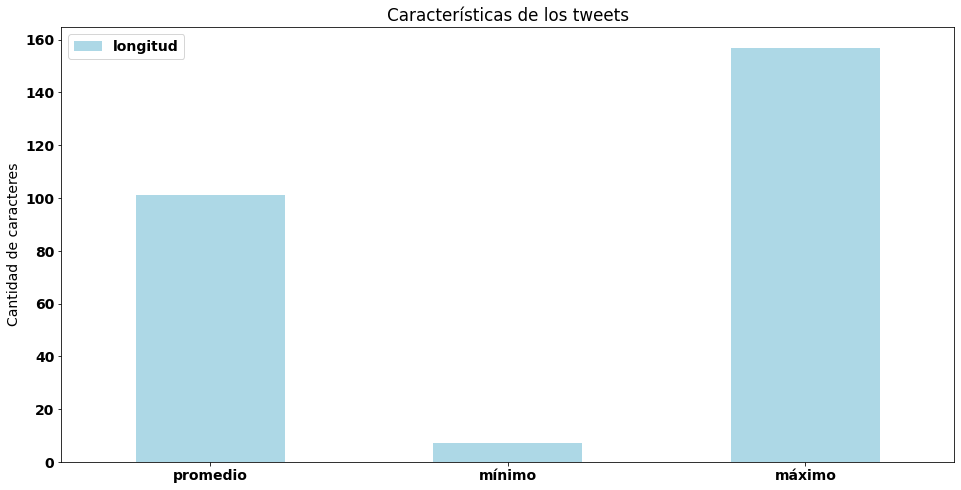

In [63]:
tweets_description.plot(kind='bar', figsize=(16,8), rot=0, title='Características de los tweets', color='lightblue');
ax = plt.gca();
ax.set_ylabel('Cantidad de caracteres')

,porcentaje
bin,
"(0, 20]",8.97
"(20, 40]",18.43
"(40, 60]",26.40
"(60, 80]",36.61
"(80, 100]",48.22
"(100, 120]",45.36
"(120, 140]",49.91
"(140, 160]",46.31
"(160, 180]",NaN


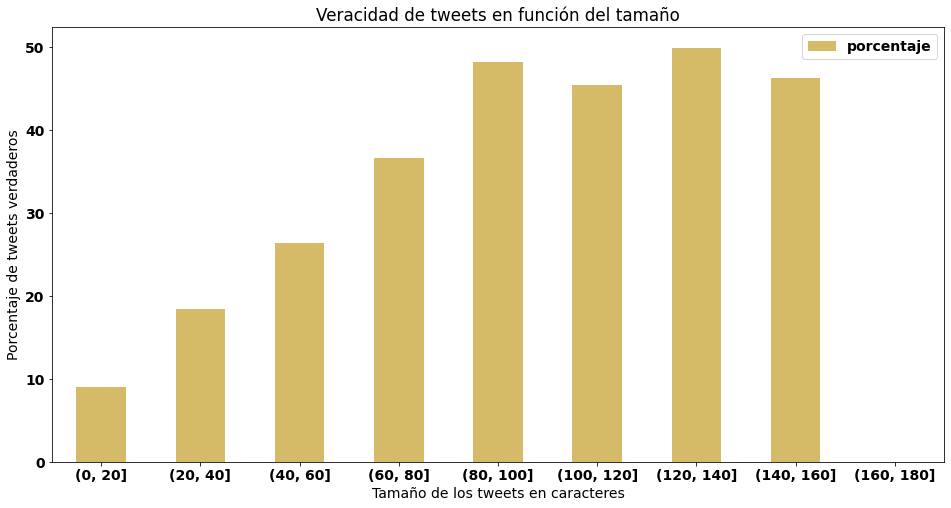

In [65]:
tweets_percentage.plot(kind='bar', figsize=(16,8), rot=0, title='Veracidad de tweets en función del tamaño', color=ListedColormap(sns.color_palette('muted'))(8));
ax = plt.gca();
ax.set_xlabel('Tamaño de los tweets en caracteres')
ax.set_ylabel('Porcentaje de tweets verdaderos')
tweets_percentage

**Insights aprendidos**

(el TP solicita: ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante?)

* Los tweets con mayor longitud tiene una mayor tendencia a la veracidad.
* Bla bla bla
* Guitarra
* Cajón